# Get Data and data split

In [7]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

data = pd.read_csv('Data/train_cluster.csv')
data.drop('Unnamed: 0', inplace=True, axis=1)

np.random.seed(42)
idx = np.random.choice(range(len(data)),int(10e4) , replace=False)
smaller_data = data.iloc[idx]

X,y = smaller_data.drop('diagnosed_diabetes', axis=1), smaller_data['diagnosed_diabetes']

x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

x_train

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,cholesterol_total,family_history_diabetes,gender_Female,ethnicity_Asian,education_level_Graduate,income_level_Low,smoking_status_Current,employment_status_Employed
462310,43,4,33,2.8,7.1,164,0,1,0,1,0,0,1
270380,59,1,50,7.1,5.1,187,0,0,0,1,0,0,1
498161,26,4,126,5.9,8.5,186,0,0,0,1,0,0,1
230493,54,1,101,5.6,6.5,188,0,0,1,0,0,0,1
580260,49,1,69,5.6,6.9,178,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
689240,63,2,70,7.8,6.6,244,0,0,1,0,0,0,1
199868,69,2,31,6.5,7.4,187,0,1,0,0,0,1,0
340386,73,4,84,6.8,6.8,191,0,0,0,0,0,0,1
304085,36,4,35,9.8,7.5,189,0,1,0,0,1,0,1


# Metric function

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     26289
         1.0       1.00      1.00      1.00     43711

    accuracy                           1.00     70000
   macro avg       1.00      1.00      1.00     70000
weighted avg       1.00      1.00      1.00     70000



{'accuracy': 1.0, 'roc_score': 1.0}

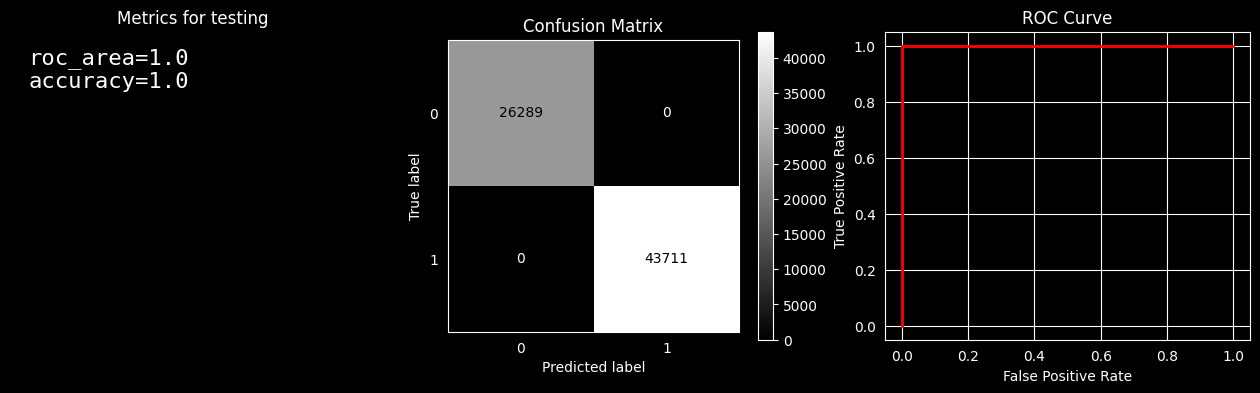

In [8]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay, \
    roc_curve, classification_report


def metrics(preds:np.ndarray, probs:np.ndarray, lables:np.ndarray, method:str):
    cf_mtx = confusion_matrix(lables, preds)
    fpr, tpr, thresholds = roc_curve(lables, probs)
    roc_area = roc_auc_score(lables, probs)
    accuracy = accuracy_score(lables, preds)

    print(classification_report(lables, preds))

    text = f"{roc_area=}\n{accuracy=}"

    cf_mtx_disp = ConfusionMatrixDisplay(confusion_matrix=cf_mtx)
    roc_disp = RocCurveDisplay(fpr=fpr,tpr=tpr)

    fig, (ax_report, ax_matrix, ax_roc) = plt.subplots(1, 3, figsize=(16, 4))
    ax_report.text(
        x=0.05,
        y=0.95,
        s=text,
        family='monospace',
        fontsize=16,
        verticalalignment='top',
        transform=ax_report.transAxes)
    ax_report.set_title(f'Metrics for {method}')
    ax_report.axis('off')

    ax_matrix.set_title("Confusion Matrix")
    ax_matrix.grid(False)
    ax_matrix = cf_mtx_disp.plot(ax=ax_matrix, cmap='grey')

    ax_roc.set_title('ROC Curve')
    ax_roc.plot(fpr,tpr, linewidth=2, label='ROC Curve', color='red')
    ax_roc.set_xlabel('False Positive Rate')
    ax_roc.set_ylabel('True Positive Rate')


    return {"accuracy": accuracy, "roc_score": roc_area}


metrics(y_train,y_train,y_train, "testing")